In [19]:
from utils import *

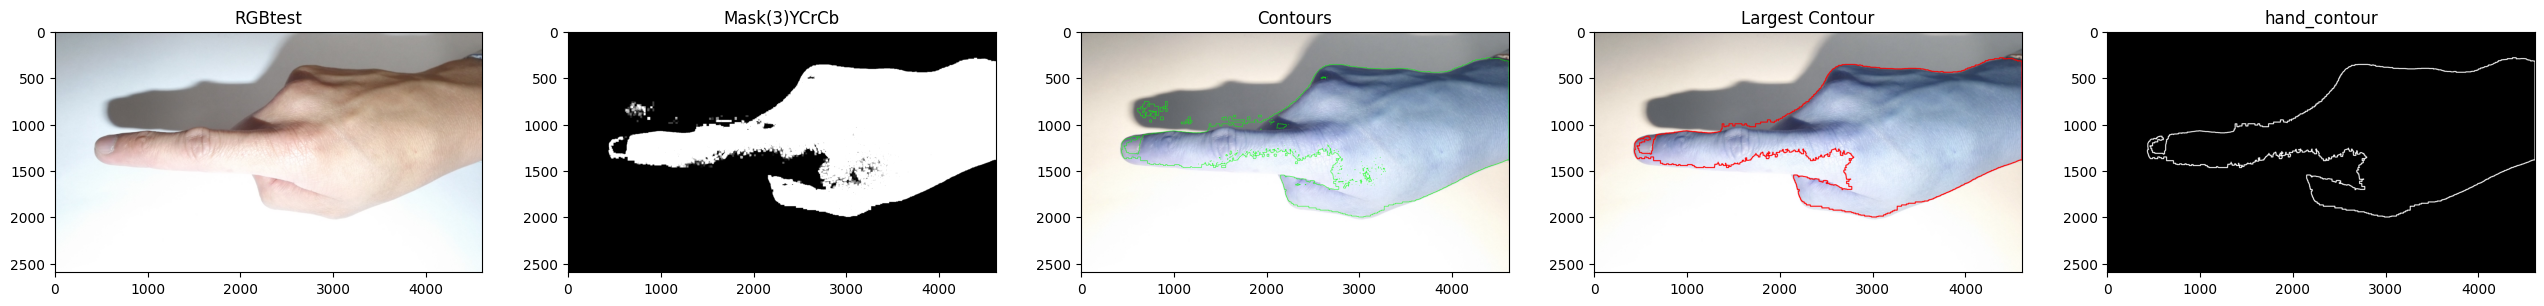

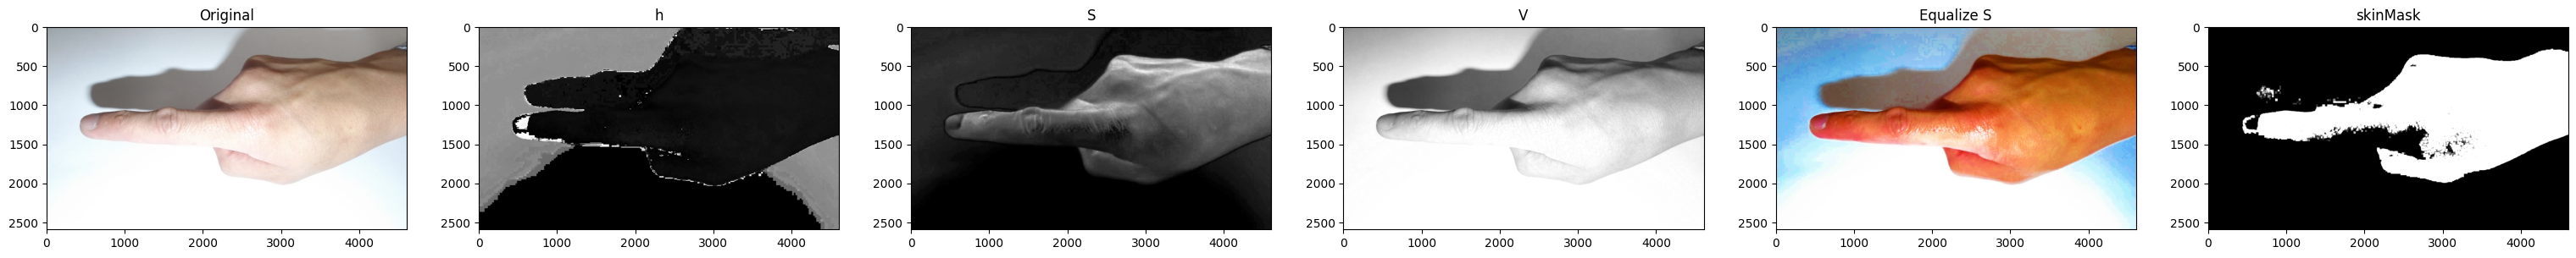

In [89]:
x=None
def pre(path):
    img1 = cv2.imread(path)
    img_hsv=cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

    H=img_hsv[:,:,0]
    S=img_hsv[:,:,1]
    V=img_hsv[:,:,2]


    #Equalize S
    img_HSV_eq=np.copy(img_hsv)
    img_HSV_eq[:,:,1]=cv2.equalizeHist(img_HSV_eq[:,:,1])


    # #Segmentation
    # # img_HSV_eq=cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
    # # Defining HSV Threadholds
    # lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    # upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # # Single Channel mask,denoting presence of colours in the about threshold
    # skinMask_b = cv2.inRange(img_HSV_eq, lower_threshold, upper_threshold)

    # # Cleaning up mask using Gaussian Filter
    # skinMask = cv2.GaussianBlur(skinMask_b, (3, 3), 0)


    # show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),H,S,V,cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB),skinMask],['Original','h','S','V','Equalize S','skinMask'])


    # min_S=np.min(S[S>=48])
    # print("min_S",min_S)

    # new_min_S=np.max(img_HSV_eq[:,:,1][S==min_S])
    # print("new_min_S: ",new_min_S)

    # diff=new_min_S-min_S
    # print("Diff: ",diff)

    # showHist(S)
    # showHist(img_HSV_eq[:,:,1])


    # Segmentation
    # Defining HSV Threadholds
    lower_threshold = np.array([0, 100, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # Single Channel mask,denoting presence of colours in the about threshold
    skinMask_b = cv2.inRange(img_HSV_eq, lower_threshold, upper_threshold)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask_b, (3, 3), 0)


    
    # # Apply Closing =(Erode+Dilate) to remove 
    kernel = np.ones((10, 10), np.uint8)
    skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_ERODE, kernel, iterations=2) #erode
    skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_DILATE, kernel, iterations=2) #Dilate Back  



    cv2.imwrite('hand.jpg',cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2BGR))

    debug=True
    name="test"

    # Find Contours
    contours, hierarchy = cv2.findContours(
        skinMask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # Draw for debug
    if (debug):
        img_contours = np.copy(img1)
        cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

    # Get Largest Contour
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    largest_contour = sorted_contours[0]
    if (debug):
        largest_contour_img = np.copy(img1)
        cv2.drawContours(largest_contour_img,
                         largest_contour, -1, (255, 0, 0), 10)

    # Binary_img_contours[Result]
    hand_contour = np.zeros((np.shape(img1)[0], np.shape(img1)[1], 1))
    cv2.drawContours(hand_contour, largest_contour, -1, 255, 10)

    if (debug):
        show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),
                    skinMask, img_contours, largest_contour_img, hand_contour],
                    ['RGB'+name, 'Mask(3)YCrCb', 'Contours', 'Largest Contour', 'hand_contour'])



    show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),H,S,V,cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB),skinMask],['Original','h','S','V','Equalize S','skinMask'])


    
    return S,img_HSV_eq[:,:,1]

S,S_eq=pre('../data/men/1/1_men (67).JPG')

In [47]:
print(S_eq)
print(S)
print(S_eq-S)

print(np.sum(S==48))
print(S[S==48])
print(S_eq[S==48])

diff=np.max(S_eq[S==48])
print(diff)

diff=diff-48
print(diff)

print(np.max(S_eq==(48+diff)))


[[106 106 106 ...  63  63  63]
 [106 106 106 ...  63  63  63]
 [106 106 106 ...  63  63  63]
 ...
 [  0   0   0 ...  36  36  36]
 [  0   0   0 ...  36  36  36]
 [  0   0   0 ...  36  36  36]]
[[20 20 20 ... 14 14 14]
 [20 20 20 ... 14 14 14]
 [20 20 20 ... 14 14 14]
 ...
 [ 0  0  0 ... 10 10 10]
 [ 0  0  0 ... 10 10 10]
 [ 0  0  0 ... 10 10 10]]
[[86 86 86 ... 49 49 49]
 [86 86 86 ... 49 49 49]
 [86 86 86 ... 49 49 49]
 ...
 [ 0  0  0 ... 26 26 26]
 [ 0  0  0 ... 26 26 26]
 [ 0  0  0 ... 26 26 26]]
60664
[48 48 48 ... 48 48 48]
[190 190 190 ... 190 190 190]
190
142
True


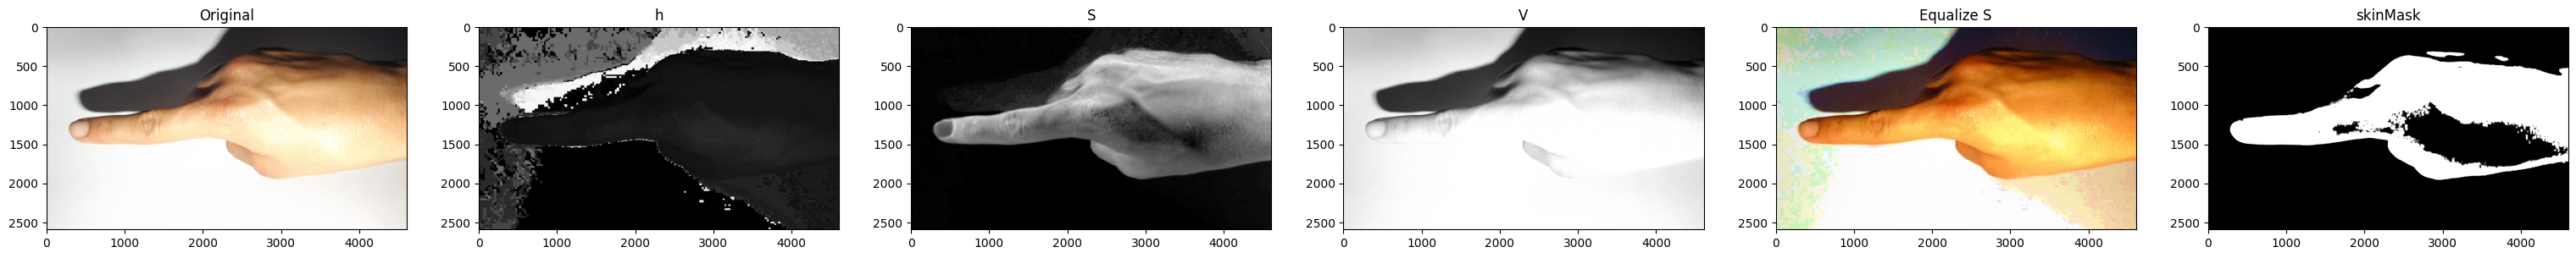

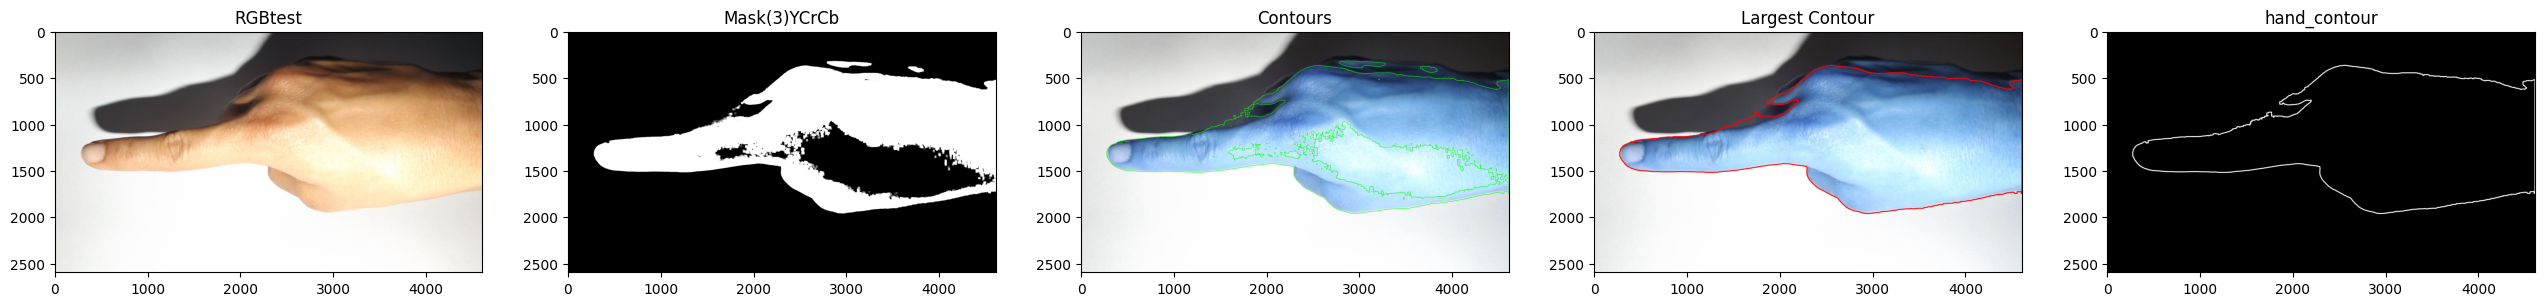

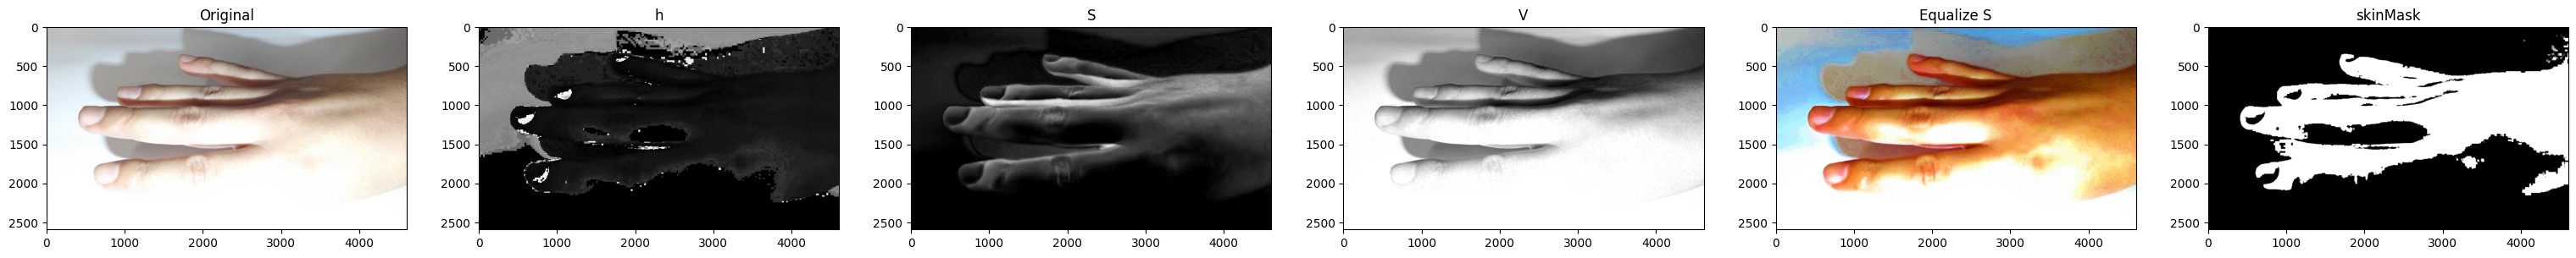

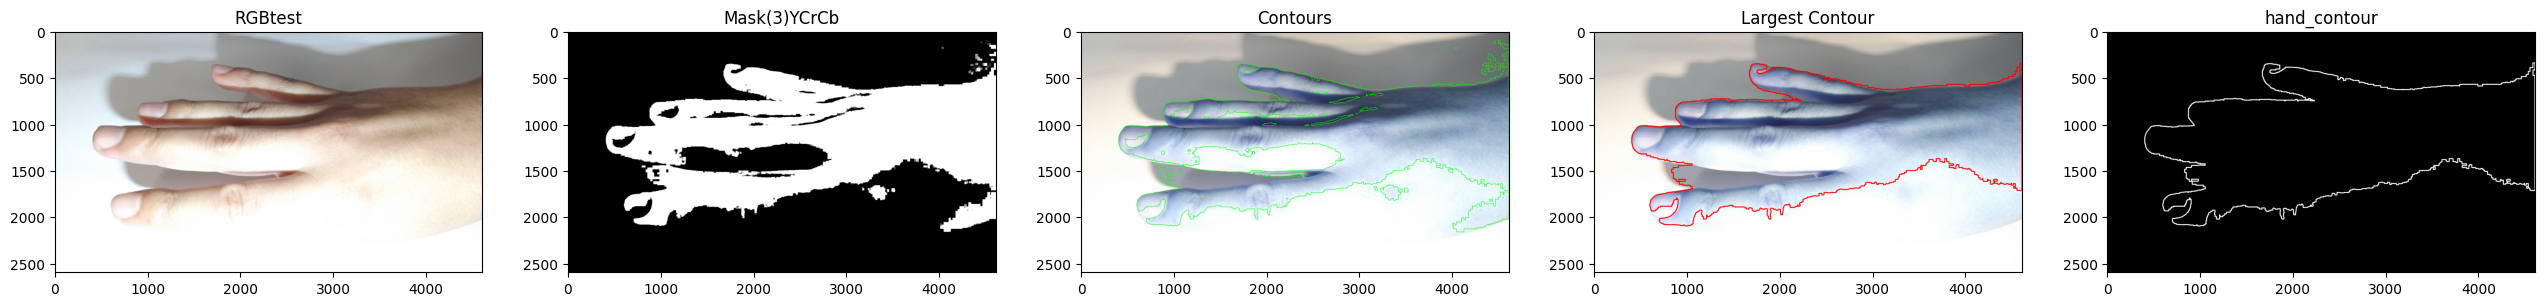

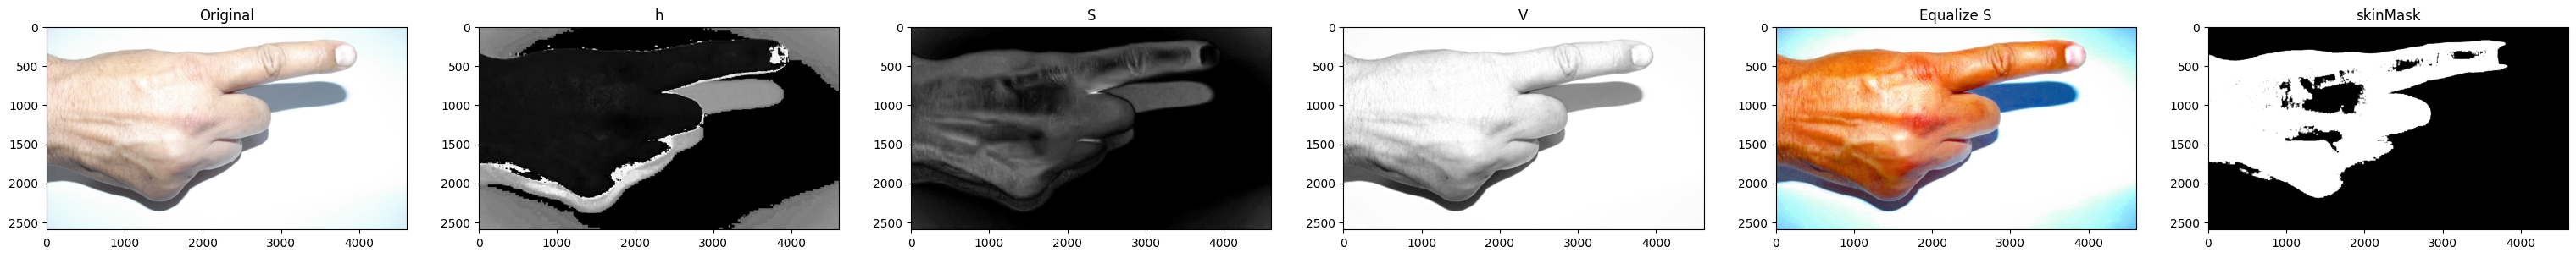

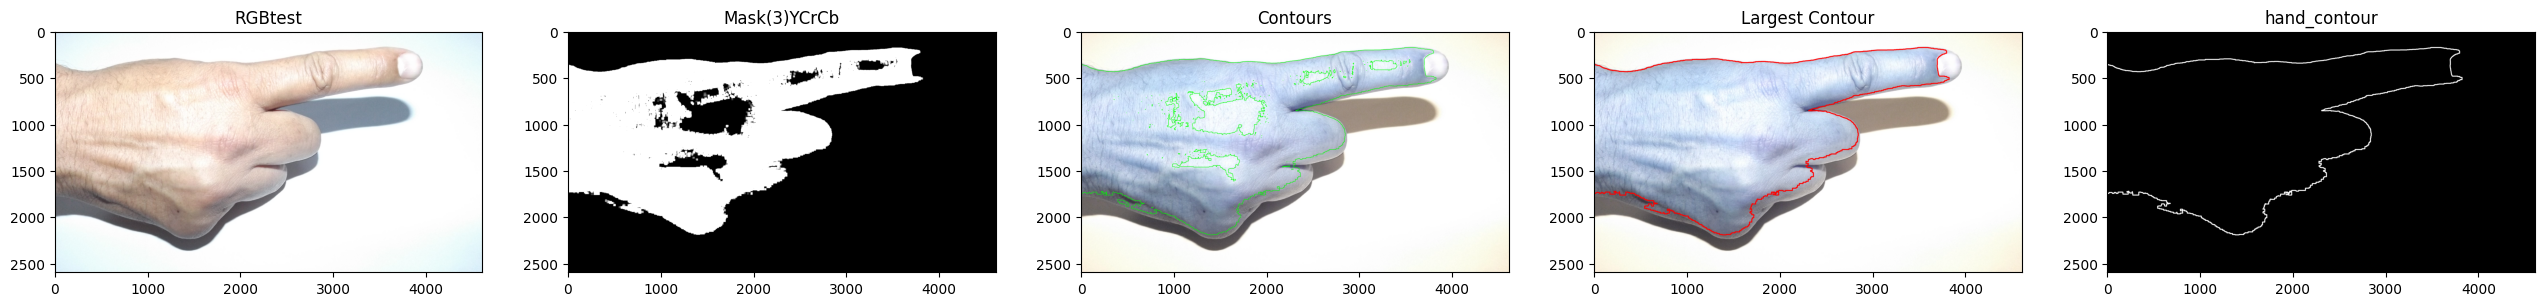

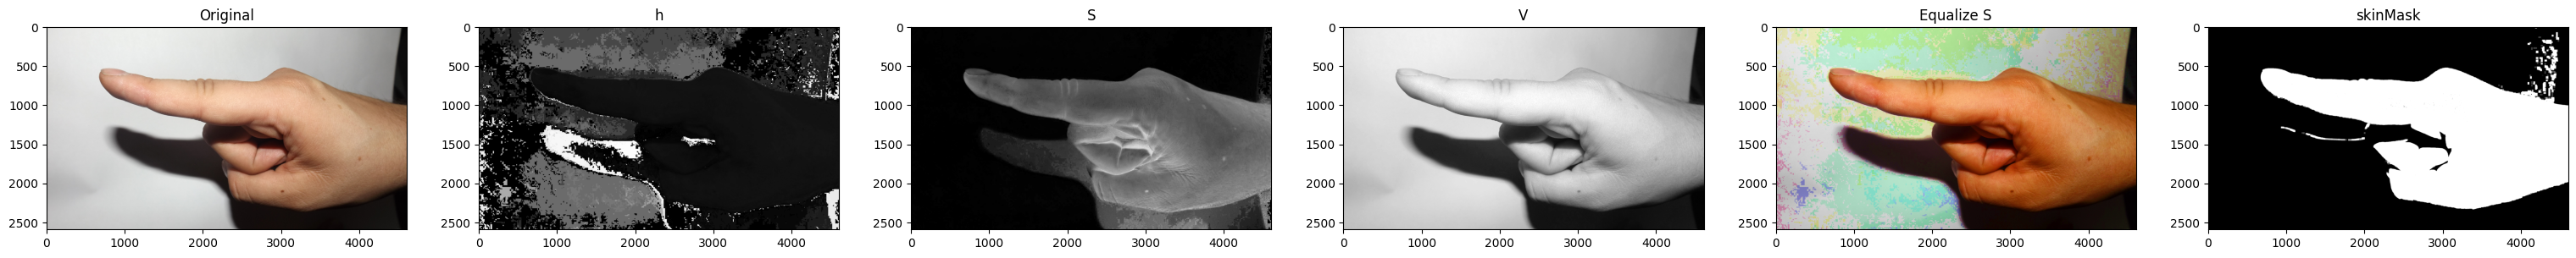

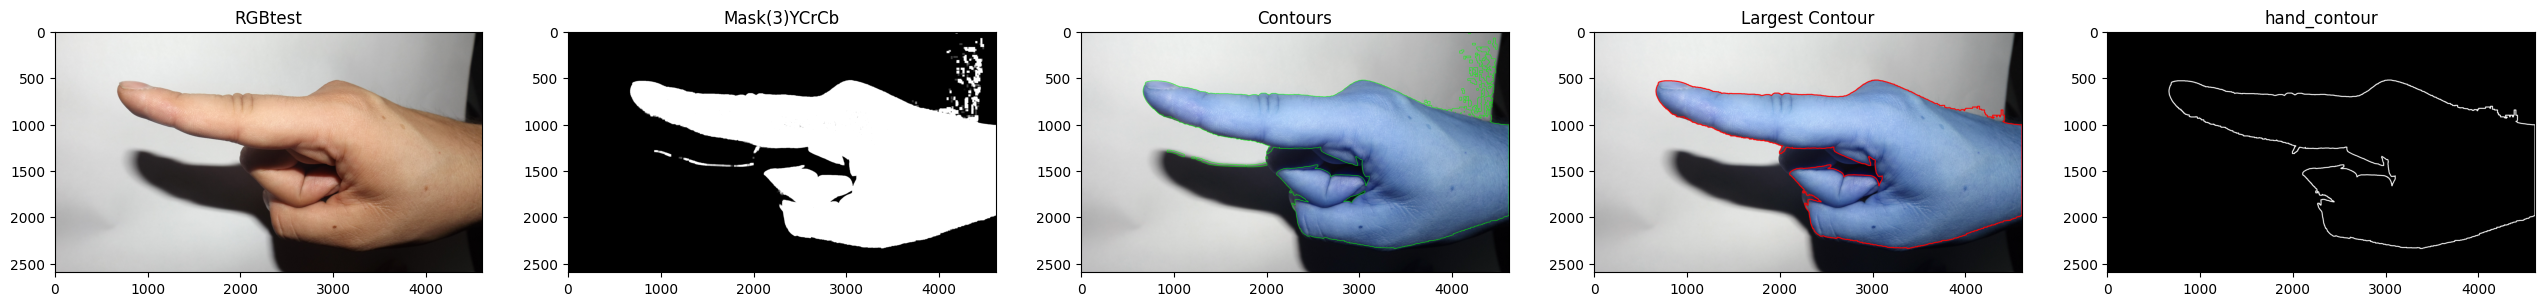

(array([[  2,   2,   2, ...,   0,   0,   0],
        [  2,   2,   2, ...,   0,   0,   0],
        [  2,   2,   2, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  85, 102, 102],
        [  0,   0,   0, ...,  85, 102, 102],
        [  0,   0,   0, ...,  85, 102, 102]], dtype=uint8),
 array([[ 54,  54,  54, ...,   0,   0,   0],
        [ 54,  54,  54, ...,   0,   0,   0],
        [ 54,  54,  54, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 155, 189, 189],
        [  0,   0,   0, ..., 155, 189, 189],
        [  0,   0,   0, ..., 155, 189, 189]], dtype=uint8))

In [84]:
pre('../data/men/1/1_men (31).JPG')
pre('../data/men/4/4_men (13).JPG')
pre('../data/men/1/1_men (139).JPG')
pre('../data/men/1/1_men (12).JPG')


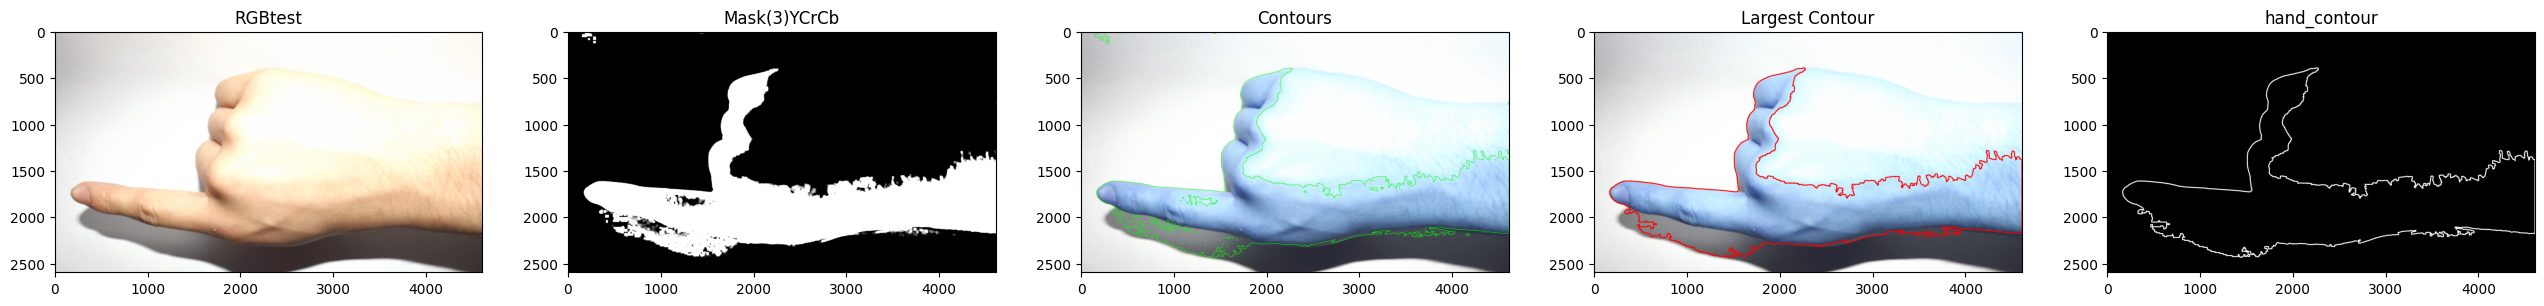

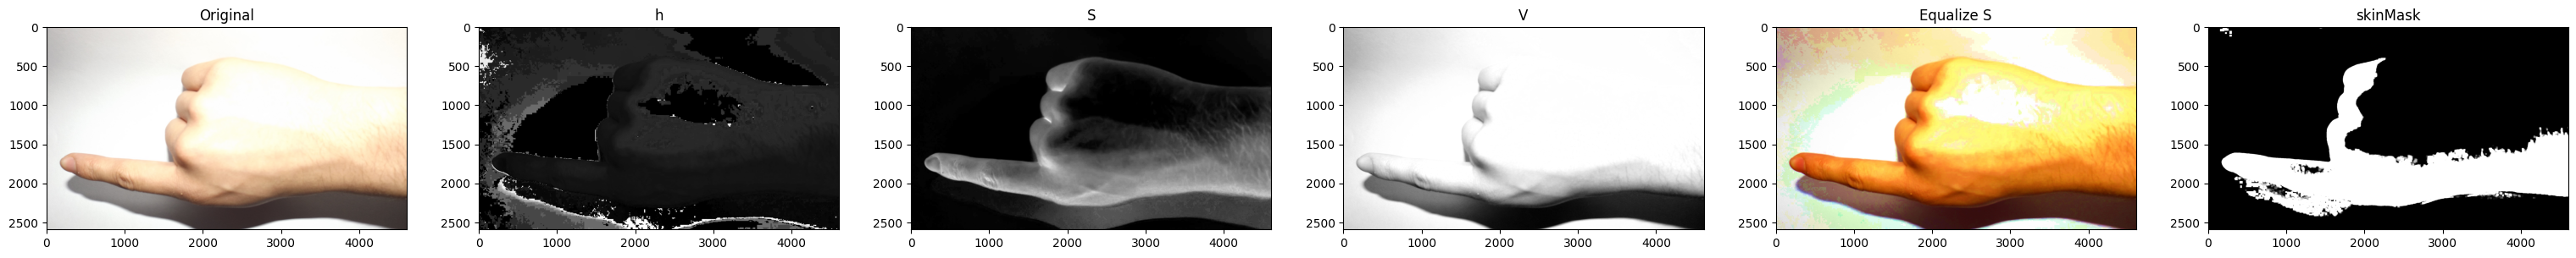

(array([[ 4,  4,  4, ..., 13, 13, 13],
        [ 4,  4,  4, ..., 13, 13, 13],
        [ 4,  4,  4, ..., 13, 13, 13],
        ...,
        [ 0,  0,  0, ..., 36, 36, 35],
        [ 0,  0,  0, ..., 36, 35, 35],
        [ 0,  0,  0, ..., 35, 35, 34]], dtype=uint8),
 array([[ 59,  59,  59, ..., 114, 114, 114],
        [ 59,  59,  59, ..., 114, 114, 114],
        [ 59,  59,  59, ..., 114, 114, 114],
        ...,
        [  0,   0,   0, ..., 149, 149, 148],
        [  0,   0,   0, ..., 149, 148, 148],
        [  0,   0,   0, ..., 148, 148, 147]], dtype=uint8))

In [90]:
pre('../data/men/1/1_men (34).JPG')
